<a href="https://colab.research.google.com/github/YusukeAoki57/diveintocode-ml/blob/master/Sprint2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [3]:
#データセットの準備
import pandas as pd 
train= pd.read_csv('drive/My Drive/DIVE INTO CODE/0_課題/1月/2_week3/授業課題/data/application_train.csv')
test=pd.read_csv('drive/My Drive/DIVE INTO CODE/0_課題/1月/2_week3/授業課題/data/application_test.csv')

"""
#x,yに分割
x = pd.DataFrame(train.drop("TARGET",axis=1))
y=  pd.DataFrame(train["TARGET"])
print(x.shape)
print(train.shape)
"""

'\n#x,yに分割\nx = pd.DataFrame(train.drop("TARGET",axis=1))\ny=  pd.DataFrame(train["TARGET"])\nprint(x.shape)\nprint(train.shape)\n'

                               corr_y
TARGET                       1.000000
DAYS_BIRTH                   0.078239
REGION_RATING_CLIENT         0.058899
REGION_RATING_CLIENT_W_CITY  0.060893
EXT_SOURCE_1                -0.155317
EXT_SOURCE_2                -0.160472
EXT_SOURCE_3                -0.178919
DAYS_LAST_PHONE_CHANGE       0.055218


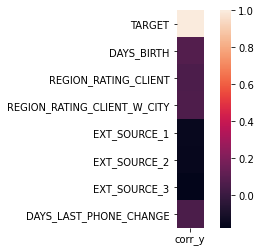

In [4]:
#相関係数
import seaborn as sns
#相関行列の作成
cor=train.corr()
corr_y = pd.DataFrame({"corr_y":cor['TARGET']},index=None) #corでは文字列の列は削除されている
#print(corr_y)

#±0.5以上の特徴量を抽出→10個
select_cols = corr_y[corr_y["corr_y"].abs()>0.055]
print(select_cols)

#相関が±0.5以上のヒートマップ
sns.heatmap(select_cols,
            square=True,
            xticklabels=select_cols.columns.values,
            yticklabels=select_cols.index.values)


In [5]:
#欠損値の確認
#pd.set_option('max_columns', None)
#pd.set_option('max_rows', None)

def null_check(train,test):
    in_t=[]
    in_t2=[]
    total1=[]
    total2=[]
    missing_ratio1=[]
    missing_ratio2=[]
    for i in train.columns:
      if i=='TARGET':
        continue
      else:
        in_t.append(i)
        total1.append(train[i].isnull().sum())
        missing_ratio1.append(train[i].isnull().sum()/len(train)*100)
      
    for i in test.columns:
      in_t2.append(i)
      total2.append(test[i].isnull().sum())
      missing_ratio2.append(test[i].isnull().sum()/len(train)*100)
   
    list={'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE'}

    matrix=np.array([total1,missing_ratio1,total2, missing_ratio2]).T
    col=['total_train','missing_ratio_train','total_test','missing_ratio_test']
    df = pd.DataFrame(matrix, columns=col, index=in_t)
    df1=df.drop(list)
    df2=df1[df.total_train>0]
    return df2
df=null_check(train,test)
print(df)

                            total_train  ...  missing_ratio_test
AMT_ANNUITY                        12.0  ...            0.007805
AMT_GOODS_PRICE                   278.0  ...            0.000000
NAME_TYPE_SUITE                  1292.0  ...            0.296250
OWN_CAR_AGE                    202929.0  ...           10.507592
OCCUPATION_TYPE                 96391.0  ...            5.074615
...                                 ...  ...                 ...
AMT_REQ_CREDIT_BUREAU_DAY       41519.0  ...            1.967084
AMT_REQ_CREDIT_BUREAU_WEEK      41519.0  ...            1.967084
AMT_REQ_CREDIT_BUREAU_MON       41519.0  ...            1.967084
AMT_REQ_CREDIT_BUREAU_QRT       41519.0  ...            1.967084
AMT_REQ_CREDIT_BUREAU_YEAR      41519.0  ...            1.967084

[63 rows x 4 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [6]:
#欠損値の削除（相関係数に出現したもの以外）train目線

drop_colomns = df[df['total_train']>=40000].index.tolist()

train_new=train.drop(drop_colomns, axis=1)
test_new=test.drop(drop_colomns, axis=1)
print(train.shape)
print(train_new.shape)
#train_new2=train_new.dropna(how='any',axis=0)


(307511, 122)
(307511, 67)


In [28]:
#欠損値の削除（相関係数に出現したもの以外）test目線
df2=null_check(train_new,test_new)

drop_colomns2 = df2[df2['total_test']>=20].index.tolist()

train_new2=train_new.drop(drop_colomns2, axis=1)
test_new2=test_new.drop(drop_colomns2, axis=1)


#list={'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE'}
#上記listの欠損を平均値で埋める

meadian1=train_new2['EXT_SOURCE_1'].median()
train_new2['EXT_SOURCE_1'].fillna(meadian1, inplace=True)

meadian2=train_new2['EXT_SOURCE_2'].median()
train_new2['EXT_SOURCE_2'].fillna(meadian2, inplace=True)

meadian3=train_new2['EXT_SOURCE_3'].median()
train_new2['EXT_SOURCE_3'].fillna(meadian3, inplace=True)

meadian4=train_new2['DAYS_LAST_PHONE_CHANGE'].median()
train_new2['DAYS_LAST_PHONE_CHANGE'].fillna(meadian4, inplace=True)


meadian10=test_new2['EXT_SOURCE_1'].median()
test_new2['EXT_SOURCE_1'].fillna(meadian10, inplace=True)

meadian20=test_new2['EXT_SOURCE_2'].median()
test_new2['EXT_SOURCE_2'].fillna(meadian20, inplace=True)

meadian30=test_new2['EXT_SOURCE_3'].median()
test_new2['EXT_SOURCE_3'].fillna(meadian30, inplace=True)

meadian40=test_new2['DAYS_LAST_PHONE_CHANGE'].median()
test_new2['DAYS_LAST_PHONE_CHANGE'].fillna(meadian40, inplace=True)


#print(train_new2['EXT_SOURCE_2'].value_counts())


train_new3=train_new2.dropna(how='any',axis=0)
train_new2.fillna(0, inplace=True)

test_new3=test_new2
#欠損値なし
print(null_check(train_new3,test_new2))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Empty DataFrame
Columns: [total_train, missing_ratio_train, total_test, missing_ratio_test]
Index: []


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [29]:
#文字列の数値化

#カラムの確認
train_new3.dtypes

#NAME_CONTRACT_TYPE
train_new3['NAME_CONTRACT_TYPE']=train_new3.loc[:,'NAME_CONTRACT_TYPE'].map({'Cash loans':1,'Revolving loans':2})
test_new3['NAME_CONTRACT_TYPE']=test_new3.loc[:,'NAME_CONTRACT_TYPE'].map({'Cash loans':1,'Revolving loans':2})
#print(train_new3.shape)

#CODE_GENDER
train_new3['CODE_GENDER']=train_new3.loc[:,'CODE_GENDER'].map({'F':1,'M':2,'XNA':3})
test_new3['CODE_GENDER']=test_new3.loc[:,'CODE_GENDER'].map({'F':1,'M':2,'XNA':3})
#print(train_new3.loc[:100,'CODE_GENDER'])

#FLAG_OWN_CAR
train_new3['FLAG_OWN_CAR']=train_new3.loc[:,'FLAG_OWN_CAR'].map({'N':1,'Y':2})
test_new3['FLAG_OWN_CAR']=test_new3.loc[:,'FLAG_OWN_CAR'].map({'N':1,'Y':2})
#print(train_new3.loc[:100,'FLAG_OWN_CAR'])

#FLAG_OWN_REALTY
train_new3['FLAG_OWN_REALTY']=train_new3.loc[:,'FLAG_OWN_REALTY'].map({'Y':1,'N':2})
test_new3['FLAG_OWN_REALTY']=test_new3.loc[:,'FLAG_OWN_REALTY'].map({'Y':1,'N':2})
#print(train_new3.loc[:100,'FLAG_OWN_REALTY'])

#NAME_INCOME_TYPE
train_new3['NAME_INCOME_TYPE']=train_new3.loc[:,'NAME_INCOME_TYPE'].map({'Working':1,'State servant':2,'Commercial associate':3,'Pensioner':4,'Unemployed':5,
                                                                         'Student':6,'Businessman':7,'Maternity leave':8})
test_new3['NAME_INCOME_TYPE']=test_new3.loc[:,'NAME_INCOME_TYPE'].map({'Working':1,'State servant':2,'Commercial associate':3,'Pensioner':4,'Unemployed':5,
                                                                         'Student':6,'Businessman':7,'Maternity leave':8})
#print(train_new3.loc[:100,'NAME_INCOME_TYPE'])

#NAME_EDUCATION_TYPE
train_new3['NAME_EDUCATION_TYPE']=train_new3.loc[:,'NAME_EDUCATION_TYPE'].map({'Secondary / secondary special':1,'Higher education':2,'Incomplete higher':3,
                                                                               'Lower secondary':4,'Academic degree':5})
test_new3['NAME_EDUCATION_TYPE']=test_new3.loc[:,'NAME_EDUCATION_TYPE'].map({'Secondary / secondary special':1,'Higher education':2,'Incomplete higher':3,
                                                                             'Lower secondary':4,'Academic degree':5})
#print(train_new3.loc[:100,'NAME_EDUCATION_TYPE'])

#NAME_FAMILY_STATUS
train_new3['NAME_FAMILY_STATUS']=train_new3.loc[:,'NAME_FAMILY_STATUS'].map({'Single / not married':1,'Married':2,'Civil marriage':3,'Widow':4,'Separated':5})
test_new3['NAME_FAMILY_STATUS']=test_new3.loc[:,'NAME_FAMILY_STATUS'].map({'Single / not married':1,'Married':2,'Civil marriage':3,'Widow':4,'Separated':5})
#print(train_new3.loc[:100,'NAME_FAMILY_STATUS'])


#NAME_HOUSING_TYPE
train_new3['NAME_HOUSING_TYPE']=train_new3.loc[:,'NAME_HOUSING_TYPE'].map({'House / apartment':1,'Rented apartment':2,'With parents':3,
                                                                             'Municipal apartment':4,'Office apartment':5,'Co-op apartment':6})
test_new3['NAME_HOUSING_TYPE']=test_new3.loc[:,'NAME_HOUSING_TYPE'].map({'House / apartment':1,'Rented apartment':2,'With parents':3,
                                                                             'Municipal apartment':4,'Office apartment':5,'Co-op apartment':6})
#print(train_new3.loc[:100,'NAME_HOUSING_TYPE'])

#WEEKDAY_APPR_PROCESS_START
train_new3=train_new3.drop('WEEKDAY_APPR_PROCESS_START', axis=1)
test_new3=test_new3.drop('WEEKDAY_APPR_PROCESS_START', axis=1)

#'ORGANIZATION_TYPE'
train_new3=train_new3.drop('ORGANIZATION_TYPE', axis=1)
test_new3=test_new3.drop('ORGANIZATION_TYPE', axis=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [30]:
#print(test_new3.dtypes)
print(test_new3.isnull().sum())

SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGIO

In [31]:
#xとyに分割
x = pd.DataFrame(train_new3.drop("TARGET",axis=1))
x_test=pd.DataFrame(test_new3)
y=  pd.DataFrame(train_new3["TARGET"]).values

#相関が高いxの特徴量のみ抽出
x1=x.loc[:,['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].values
x1_test=x_test.loc[:,['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']].values

In [11]:
"""
#新たな特徴量を生成　Polynomial Features

poly_features = train_1[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH','TARGET']]
poly_features_test = test_1[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing valuesfrom 
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])


# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)
"""

"\n#新たな特徴量を生成\u3000Polynomial Features\n\npoly_features = train_1[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH','TARGET']]\npoly_features_test = test_1[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]\n\n# imputer for handling missing valuesfrom \nfrom sklearn.impute import SimpleImputer\n\nimputer = SimpleImputer(strategy = 'median')\n\npoly_target = poly_features['TARGET']\n\npoly_features = poly_features.drop(columns = ['TARGET'])\n\n\n# Need to impute missing values\npoly_features = imputer.fit_transform(poly_features)\npoly_features_test = imputer.transform(poly_features_test)\n\nfrom sklearn.preprocessing import PolynomialFeatures\n                                  \n# Create the polynomial object with specified degree\npoly_transformer = PolynomialFeatures(degree = 3)\n"

In [12]:
"""
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)
"""

"\n# Train the polynomial features\npoly_transformer.fit(poly_features)\n\n# Transform the features\npoly_features = poly_transformer.transform(poly_features)\npoly_features_test = poly_transformer.transform(poly_features_test)\nprint('Polynomial Features shape: ', poly_features.shape)\n"

In [13]:
"""
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))
"""

"\n# Create a dataframe of the features \npoly_features = pd.DataFrame(poly_features, \n                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', \n                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))\n\n# Add in the target\npoly_features['TARGET'] = poly_target\n\n# Find the correlations with the target\npoly_corrs = poly_features.corr()['TARGET'].sort_values()\n\n# Display most negative and most positive\nprint(poly_corrs.head(10))\nprint(poly_corrs.tail(5))\n"

In [14]:
#ロジスティック回帰のインスタンス生成
lg = LogisticRegression()

In [15]:
"""
#クロスバリデーション
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lg,x,y)

"""

'\n#クロスバリデーション\nfrom sklearn.model_selection import cross_val_score\nscores=cross_val_score(lg,x,y)\n\n'

In [16]:
"""
print('Cross-Validation scores: {}'.format(scores))
# スコアの平均値
print('Average score: {}'.format(np.mean(scores)))
"""

"\nprint('Cross-Validation scores: {}'.format(scores))\n# スコアの平均値\nprint('Average score: {}'.format(np.mean(scores)))\n"

In [17]:

import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

def Kfold(x,model):
  ev=[]
  kf = KFold(n_splits=5,random_state=42)
  kf.get_n_splits(x)
  for train_index, test_index in kf.split(x):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #学習
    model.fit(X_train,y_train)
    y_pred=model.predict_proba(X_test)[:,1]
    #評価
    ev.append(roc_auc_score(y_test,y_pred))

  return np.mean(ev),model,y_pred

問題2 グリッドサーチ

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
param_grid = [{"C": [0.001,0.01,0.1,1,10,100,1000],
                                  "penalty": ['l1','l2']}]
lg=LogisticRegression()

#訓練データとテストデータに分割
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.25, random_state=0)

grid_search=GridSearchCV(lg,param_grid,cv=5,scoring='roc_auc')
grid_search.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [19]:
param=grid_search.best_params_
print(param)

#テストデータを使用してスコアを表示
print("test set score:{:.2f}".format(grid_search.score(x_test, y_test)))
print(grid_search.best_estimator_)

cvres=grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
  print(mean_score,params)


{'C': 1000, 'penalty': 'l2'}
test set score:0.72
LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
nan {'C': 0.001, 'penalty': 'l1'}
0.717013060738279 {'C': 0.001, 'penalty': 'l2'}
nan {'C': 0.01, 'penalty': 'l1'}
0.7182064935531265 {'C': 0.01, 'penalty': 'l2'}
nan {'C': 0.1, 'penalty': 'l1'}
0.718443205746248 {'C': 0.1, 'penalty': 'l2'}
nan {'C': 1, 'penalty': 'l1'}
0.7184649035125088 {'C': 1, 'penalty': 'l2'}
nan {'C': 10, 'penalty': 'l1'}
0.7184665919975494 {'C': 10, 'penalty': 'l2'}
nan {'C': 100, 'penalty': 'l1'}
0.7184667443327186 {'C': 100, 'penalty': 'l2'}
nan {'C': 1000, 'penalty': 'l1'}
0.7184667468803598 {'C': 1000, 'penalty': 'l2'}


In [20]:
#ロジスティック回帰のパラメータ調整
lg2=LogisticRegression(**param)


mean_roc,model,y_pred_lg=Kfold(x1,lg2)
print(mean_roc)
#ホールドアウト法
lg2.fit(x_train,y_train)
y_pred3=lg2.predict_proba(x_test)[:,1]
print("ROC: "+str(roc_auc_score(y_test,y_pred3)))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

0.7178175370261443


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ROC: 0.7160044240847179


問題3 Kaggle Notebooksからの調査

In [21]:
#クロスバリデーション

#:層化k分割交差検証
#:RandomForest
#optional:SVC
#optional:アンサンブル学習

問題4 高い汎化性能のモデル作成

In [22]:
#層化分割交差検証
from sklearn.model_selection import StratifiedKFold

def StratifieldKfold(x,y,model):
  ev=[]
  kf = StratifiedKFold(n_splits=2, shuffle=True)
  for train_index, test_index in kf.split(x1,y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x1[train_index], x1[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #学習
    model.fit(X_train,y_train)
    y_pred=model.predict_proba(X_test)[:, 1]
    #評価
    ev.append(roc_auc_score(y_test,y_pred))

  return np.mean(ev)

In [23]:
#層化分割
print(StratifieldKfold(x1,y,lg2))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7178369435976582


In [24]:
"""
#投票分類機 アンサンブル1
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

log_clf=LogisticRegression(solver='lbfgs', max_iter=10000)
rnd_clf=RandomForestClassifier(n_estimators=40)
svm_clf=SVC(probability = True )

voting_clf=VotingClassifier(
    estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting='soft')
    """

"\n#投票分類機 アンサンブル1\nfrom sklearn.ensemble import VotingClassifier\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.svm import SVC\n\nlog_clf=LogisticRegression(solver='lbfgs', max_iter=10000)\nrnd_clf=RandomForestClassifier(n_estimators=40)\nsvm_clf=SVC(probability = True )\n\nvoting_clf=VotingClassifier(\n    estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting='soft')\n    "

In [25]:
"""
voting_clf.fit(x_train,y_train)
y_pred5=voting_clf.predict_proba(x_test)[:,1]
roc=roc_auc_score(y_test,y_pred5)
print(roc)
"""

'\nvoting_clf.fit(x_train,y_train)\ny_pred5=voting_clf.predict_proba(x_test)[:,1]\nroc=roc_auc_score(y_test,y_pred5)\nprint(roc)\n'

In [24]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#RandomForest 訓練データ
rf10=RandomForestClassifier()
mean1,rf11,y_pred_rf=Kfold(x1,rf10)
#y_pred_rf=rf11.predict_proba(x_test)[:,1]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.

In [25]:
print(mean1)

0.6291876059091303


In [33]:
#テストデータ

#RandomForest テストデータ
y_pred_rf_test=rf11.predict_proba(x1_test)[:,1]

#LogisticRegression テストデータ
y_pred_lg_test=lg2.predict_proba(x1_test)[:,1]

In [39]:
#表の作成 
"""
Votingはfitとpredictの処理が重すぎて1時間以上計算時間を要するため、今回は表作成不可
代替として層化交差検証とクロス検証の比較表を作成
"""

metrics = pd.DataFrame({'Logistic': mean_roc,#ロジスティック回帰
                         'RandomForest':mean1},index=['XvalidatedROC']) #RandomForesr
print(metrics)

               Logistic  RandomForest
XvalidatedROC  0.717818      0.629188


問題5 最終的なモデルの選定

In [47]:
#LogisticRegressionを採用

print(test.shape[0])
print(y_pred_lg_test.shape)

#kaggle用ファイル生成
submission=pd.DataFrame({'SK_ID_CURR':test['SK_ID_CURR'],'TARGET':y_pred_lg_test})

pd.DataFrame(submission, columns=['SK_ID_CURR','TARGET'],index=None).to_csv('drive/My Drive/DIVE INTO CODE/0_課題/2月/0_week1//homecreditdata.csv')

48744
(48744,)


In [48]:
#kaggle提出後のスコア
0.70862
#本notebook上のスコア
0.717818 
#約0.01の差が発生。やや訓練上で過学習しているものと思われる

0.717818